In [1]:
import os

if os.path.basename(os.getcwd()) == "illustration":
    os.chdir("..")
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [2]:
import datajoint as dj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

In [3]:
from workflow.pipeline import *

[2024-07-10 17:45:32,173][INFO]: Connecting milagros@db.datajoint.com:3306
[2024-07-10 17:45:33,709][INFO]: Connected milagros@db.datajoint.com:3306


In [27]:
keys1 = (ephys.QualityMetrics & 'organoid_id="O09"' & "paramset_idx=1").fetch("KEY")
keys2 = (ephys.QualityMetrics & 'organoid_id="O10"' & "paramset_idx=1").fetch("KEY")
keys3 = (ephys.QualityMetrics & 'organoid_id="O11"' & "paramset_idx=1").fetch("KEY")
keys4 = (ephys.QualityMetrics & 'organoid_id="O12"' & "paramset_idx=1").fetch("KEY")

batch1_keys = keys1 + keys2 + keys3 + keys4

In [28]:
keys1 = (ephys.QualityMetrics & 'organoid_id="O13"' & "paramset_idx=1").fetch("KEY")
keys2 = (ephys.QualityMetrics & 'organoid_id="O14"' & "paramset_idx=1").fetch("KEY")
keys3 = (ephys.QualityMetrics & 'organoid_id="O15"' & "paramset_idx=1").fetch("KEY")
keys4 = (ephys.QualityMetrics & 'organoid_id="O16"' & "paramset_idx=1").fetch("KEY")

batch2_keys = keys1 + keys2 + keys3 + keys4

In [29]:
keys1 = (ephys.QualityMetrics & 'organoid_id="O17"' & "paramset_idx=1").fetch("KEY")
keys2 = (ephys.QualityMetrics & 'organoid_id="O18"' & "paramset_idx=1").fetch("KEY")
keys3 = (ephys.QualityMetrics & 'organoid_id="O19"' & "paramset_idx=1").fetch("KEY")
keys4 = (ephys.QualityMetrics & 'organoid_id="O20"' & "paramset_idx=1").fetch("KEY")

batch3_keys = keys1 + keys2 + keys3 + keys4

### Exploration of Batch1

In [94]:
# Fetching the peak waveforms
peak_wfs1 = (ephys.WaveformSet.PeakWaveform & batch1_keys).fetch(
    "peak_electrode_waveform"
)

# Fetching the sample rate
session_info_keys1 = (ephys.EphysSessionInfo & batch1_keys).fetch("session_info")
unique_sample_rates1 = {
    d["sample_rate"] for d in session_info_keys1 if "sample_rate" in d
}

# Ensure there is exactly one unique sample rate for all the selected entries
if len(unique_sample_rates1) != 1:
    raise ValueError(
        f"Expected exactly one unique sample rate, but found {len(unique_sample_rates1)}: {unique_sample_rates1}"
    )

sample_rate1 = unique_sample_rates1.pop() / 1e3  # sampling rate in kHz

# Compute peak waveform timestamps
peak_wf_timestamps1 = np.arange(len(peak_wfs1[0])) / sample_rate1  # ms

num_waveforms1 = len(peak_wfs1)

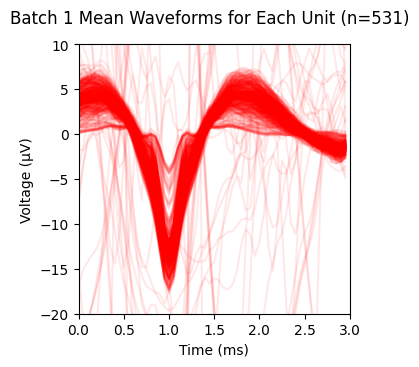

In [95]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(num_waveforms1):
    plt.plot(peak_wf_timestamps1, peak_wfs1[idx], color="red", alpha=0.09)
plt.suptitle(f"Batch 1 Mean Waveforms for Each Unit (n={num_waveforms1})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

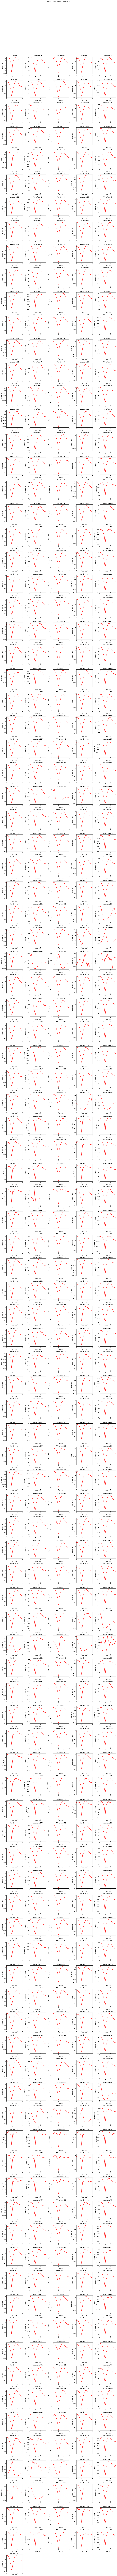

In [96]:
# Calculate the number of rows and columns for the subplot grid
cols = 5
rows = int(np.ceil(num_waveforms1 / cols))

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()  # Flatten to easily iterate over subplots

for idx, ax in enumerate(axes):
    if idx < num_waveforms1:
        ax.plot(peak_wf_timestamps1, peak_wfs1[idx], color="red", alpha=0.9)
        ax.set_title(f"Waveform {idx+1}")
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Voltage (μV)")
        ax.set_xlim(0, 3)
    else:
        fig.delaxes(ax)  # Remove unused subplots

plt.suptitle(
    f"Batch 1 Mean Waveforms (n={num_waveforms1})",
    y=1.02,  # Adjust y for title spacing
)
plt.tight_layout()
plt.show()

### Exploration of Batch2

In [97]:
# Fetching the peak waveforms
peak_wfs2 = (ephys.WaveformSet.PeakWaveform & batch2_keys).fetch(
    "peak_electrode_waveform"
)

# Fetching the sample rate
session_info_keys2 = (ephys.EphysSessionInfo & batch2_keys).fetch("session_info")
unique_sample_rates2 = {
    d["sample_rate"] for d in session_info_keys2 if "sample_rate" in d
}

# Ensure there is exactly one unique sample rate for all the selected entries
if len(unique_sample_rates2) != 1:
    raise ValueError(
        f"Expected exactly one unique sample rate, but found {len(unique_sample_rates2)}: {unique_sample_rates2}"
    )

sample_rate2 = unique_sample_rates2.pop() / 1e3  # sampling rate in kHz

# Compute peak waveform timestamps
peak_wf_timestamps2 = np.arange(len(peak_wfs2[0])) / sample_rate2  # ms

num_waveforms2 = len(peak_wfs2)

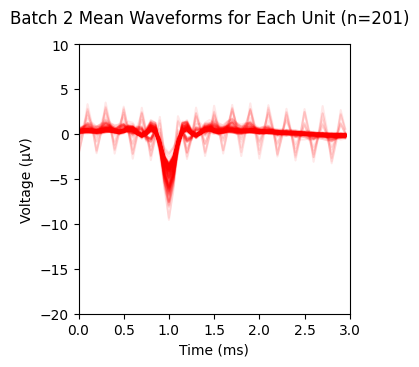

In [98]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(num_waveforms2):
    plt.plot(peak_wf_timestamps2, peak_wfs2[idx], color="red", alpha=0.09)
plt.suptitle(f"Batch 2 Mean Waveforms for Each Unit (n={num_waveforms2})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

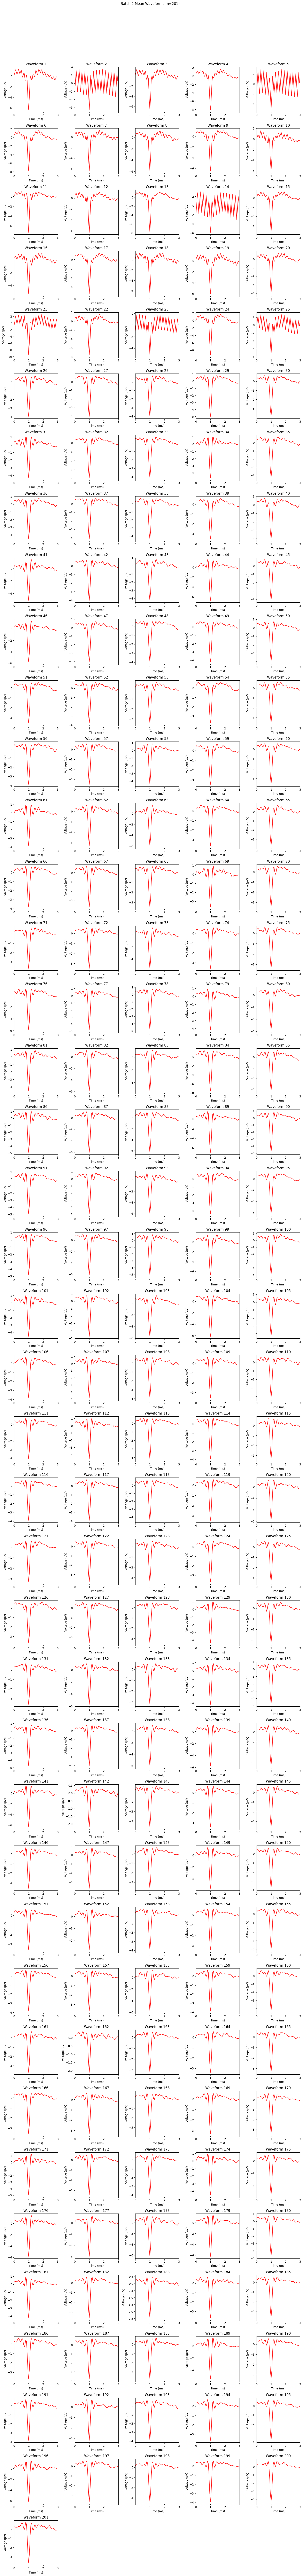

In [99]:
# Calculate the number of rows and columns for the subplot grid
cols = 5
rows = int(np.ceil(num_waveforms2 / cols))

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()  # Flatten to easily iterate over subplots

for idx, ax in enumerate(axes):
    if idx < num_waveforms2:
        ax.plot(peak_wf_timestamps2, peak_wfs2[idx], color="red", alpha=0.9)
        ax.set_title(f"Waveform {idx+1}")
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Voltage (μV)")
        ax.set_xlim(0, 3)
    else:
        fig.delaxes(ax)  # Remove unused subplots

plt.suptitle(
    f"Batch 2 Mean Waveforms (n={num_waveforms2})",
    y=1.02,  # Adjust y for title spacing
)
plt.tight_layout()
plt.show()

### Exploration of Batch3

In [100]:
# Fetching the peak waveforms
peak_wfs3 = (ephys.WaveformSet.PeakWaveform & batch3_keys).fetch(
    "peak_electrode_waveform"
)

# Fetching the sample rate
session_info_keys3 = (ephys.EphysSessionInfo & batch3_keys).fetch("session_info")
unique_sample_rates3 = {
    d["sample_rate"] for d in session_info_keys3 if "sample_rate" in d
}

# Ensure there is exactly one unique sample rate for all the selected entries
if len(unique_sample_rates3) != 1:
    raise ValueError(
        f"Expected exactly one unique sample rate, but found {len(unique_sample_rates3)}: {unique_sample_rates3}"
    )

sample_rate3 = unique_sample_rates3.pop() / 1e3  # sampling rate in kHz

# Compute peak waveform timestamps
peak_wf_timestamps3 = np.arange(len(peak_wfs3[0])) / sample_rate3  # ms

num_waveforms3 = len(peak_wfs3)

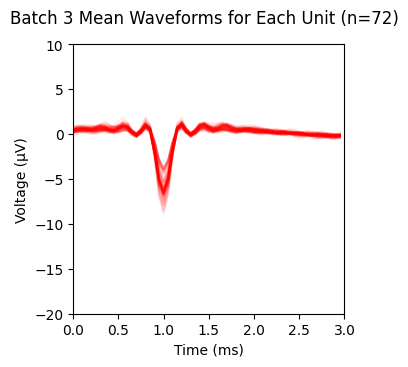

In [102]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(num_waveforms3):
    plt.plot(peak_wf_timestamps3, peak_wfs3[idx], color="red", alpha=0.09)
plt.suptitle(f"Batch 3 Mean Waveforms for Each Unit (n={num_waveforms3})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

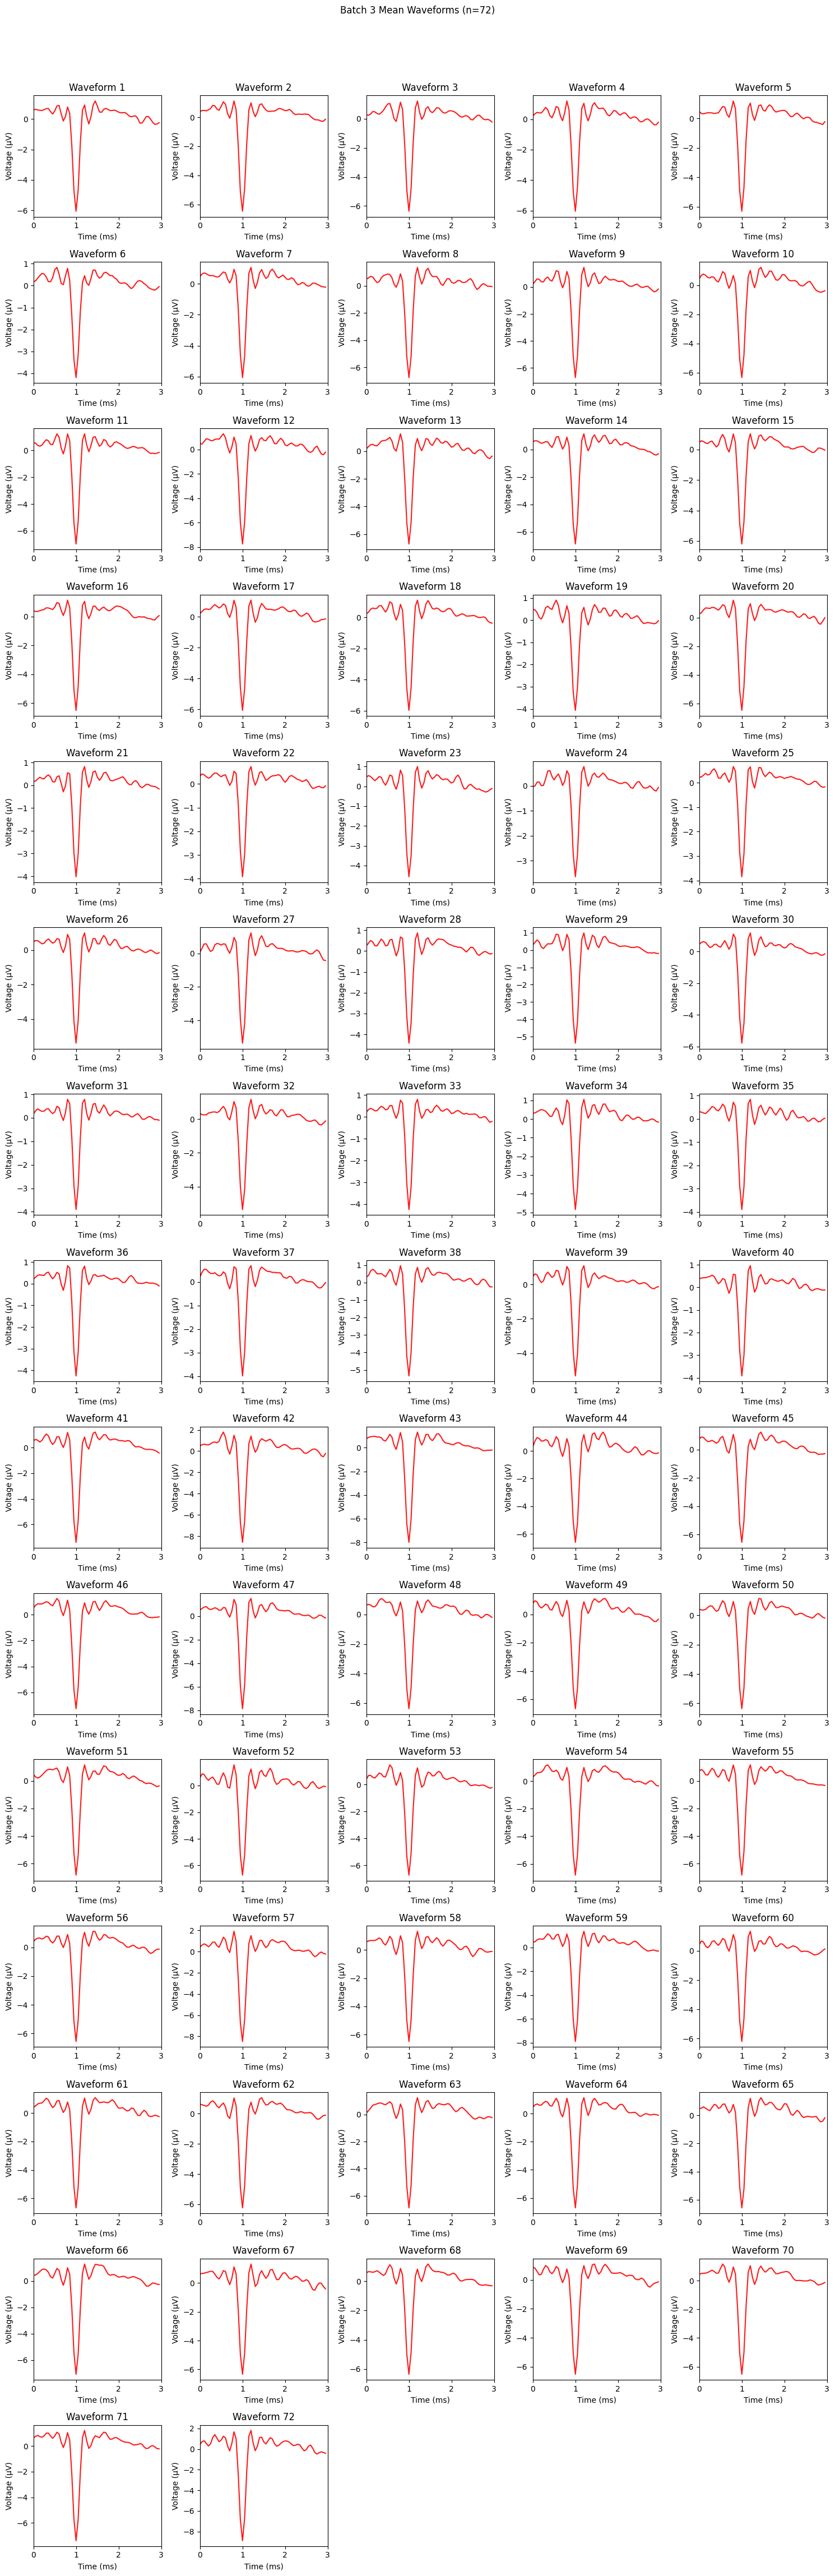

In [104]:
# Calculate the number of rows and columns for the subplot grid
cols = 5
rows = int(np.ceil(num_waveforms3 / cols))

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()  # Flatten to easily iterate over subplots

for idx, ax in enumerate(axes):
    if idx < num_waveforms3:
        ax.plot(peak_wf_timestamps3, peak_wfs3[idx], color="red", alpha=0.9)
        ax.set_title(f"Waveform {idx+1}")
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Voltage (μV)")
        ax.set_xlim(0, 3)
    else:
        fig.delaxes(ax)  # Remove unused subplots

plt.suptitle(
    f"Batch 3 Mean Waveforms (n={num_waveforms3})",
    y=1.02,  # Adjust y for title spacing
)
plt.tight_layout()
plt.show()